<a href="https://colab.research.google.com/github/DCI-alxogm/ml2023-David-Nicolas364/blob/main/Ago26/Tarea26_ago1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = np.loadtxt("olympic100m_men.txt",delimiter=',').T

In [3]:
x_exp=np.array([1896., 1904., 1908., 1920., 1928.,
       1936., 1948., 1952., 1956., 1960., 1964., 1968., 1972.,
       1976., 1980., 1984., 1988., 1992., 1996., 2000., 2004., 2008.])

In [4]:
y_exp=np.array([12, 11. , 10.8 , 10.8 , 10.8
        , 10.3 , 10.3 , 10.4 , 10.5 , 10.2 , 10.  ,  9.95, 10.14,
       10.06, 10.25,  9.99,  9.92,  9.96,  9.84,  9.87,  9.85,  9.69])

In [5]:
x_val=np.array([1900., 1906., 1912., 1924., 1932.])

In [6]:
y_val=np.array([ 11., 11.2 , 10.8, 10.6, 10.3])

In [7]:
x=data[0]
y=data[1]

In [8]:
#Para X de grado n
def w(x,y,n):
  X=np.vstack((np.ones_like(x)))
  i=1
  while i<= n:
    T=x**i
    TT= np.reshape(T,(np.shape(x)[0],1))
    X=np.hstack((X, TT))
    i+=1
  XT=X.T
  inv= np.linalg.inv(np.matmul(XT,X))
  t=y
  w=np.matmul(inv,np.matmul(XT,t))
  return w

In [9]:
M=w(x,y,2)

In [10]:
Y=M[0]+M[1]*x+M[2]*x**2

Mínimos cuadrados regularizados

In [11]:
def w_reg(x,y,n,lamb):
  X=np.vstack((np.ones_like(x)))
  i=1
  while i<= n:
    T=x**i
    TT= np.reshape(T,(np.shape(x)[0],1))
    X=np.hstack((X, TT))
    i+=1
  XT=X.T
  inv= np.linalg.inv(np.matmul(XT,X)+n*lamb*np.identity(n+1))
  t=y
  w=np.matmul(inv,np.matmul(XT,t))
  return w

In [12]:
Mr=w_reg(x,y,2,0.5)

In [13]:
Yr=Mr[0]+Mr[1]*x+Mr[2]*x**2

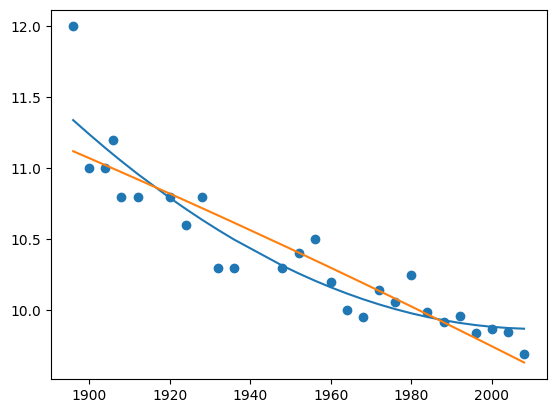

In [14]:
plt.scatter(x,y)
plt.plot(x,Y)
plt.plot(x,Yr)

Cross-validation

In [38]:
#Función costo
def V(w,y_val,x_val):
  for i in range(np.size(w)):
    if i==0:
      Y=w[0]
    else:
        Y+=w[i]*x_val**i
  Costo=(Y-y_val)**2
  CostoT=(np.sum(Costo))
  return CostoT

In [143]:
#función para eleminar un elemento de los datos
def one(x,y,n):
  CostoT = []
  for i in range(np.shape(x)[0]):
    xval = x[i]
    yval = y[i]

    x_ent = np.delete(x,i)
    y_ent = np.delete(y,i)

    Peso = w(x_ent,y_ent,n)
    Costo = V(Peso,yval,xval)

    CostoT.append(Costo)

    Lcv=np.sum(CostoT)/(np.shape(x)[0])

  return Lcv

In [144]:
#normalización
x2=(x-1896)/4

In [145]:
Z = w(np.delete(x2,0),np.delete(y,0),7)
print(Z)
V(Z,y[0],x2[0])

[ 1.09086858e+01  1.71617839e-01 -7.69592207e-02  1.07428035e-02
 -7.59624232e-04  2.88194385e-05 -5.54407091e-07  4.19356233e-09]


1.1909667315715813

In [147]:
csv=one(x2,y,8)
csv

0.0934944993103078

In [148]:
NN=[1,2,3,4,5,6,7,8]
Vac=[]
for i in NN:
    csv = one(x2,y,i)
    Vac.append(csv)

Vac

[0.06243184967324323,
 0.056594361575115666,
 0.05295193744110756,
 0.06097492277208293,
 0.06412319997036589,
 0.07890079737054204,
 0.07819293189271742,
 0.0934944993103078]

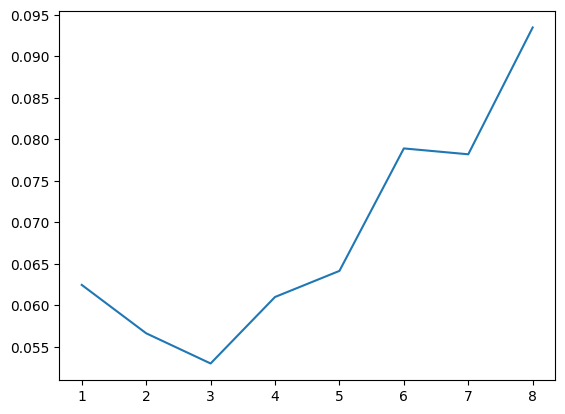

In [149]:
plt.plot(NN,Vac)